imports

In [1]:
%matplotlib inline
import statsmodels as sm
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import scipy.stats as stats
sns.set(style="white")

## Getting and exploring the data

In [2]:
immer_ds = sm.datasets.get_rdataset("immer", "MASS")

In [3]:
print immer_ds.__doc__

+---------+-------------------+
| immer   | R Documentation   |
+---------+-------------------+

Yields from a Barley Field Trial
--------------------------------

Description
~~~~~~~~~~~

The ``immer`` data frame has 30 rows and 4 columns. Five varieties of
barley were grown in six locations in each of 1931 and 1932.

Usage
~~~~~

::

    immer

Format
~~~~~~

This data frame contains the following columns:

``Loc``
    The location.

``Var``
    The variety of barley (``"manchuria"``, ``"svansota"``,
    ``"velvet"``, ``"trebi"`` and ``"peatland"``).

``Y1``
    Yield in 1931.

``Y2``
    Yield in 1932.

Source
~~~~~~

Immer, F.R., Hayes, H.D. and LeRoy Powers (1934) Statistical
determination of barley varietal adaptation. *Journal of the American
Society for Agronomy* **26**, 403–419.

Fisher, R.A. (1947) *The Design of Experiments.* 4th edition. Edinburgh:
Oliver and Boyd.

References
~~~~~~~~~~

Venables, W. N. and Ripley, B. D. (1999) *Modern Applied Statistics with
S-PLUS.* Thir

In [4]:
immer_data = immer_ds.data
immer_ds.data

,Loc,Var,Y1,Y2
0,UF,M,81.0,80.7
1,UF,S,105.4,82.3
2,UF,V,119.7,80.4
3,UF,T,109.7,87.2
4,UF,P,98.3,84.2
5,W,M,146.6,100.4
6,W,S,142.0,115.5
7,W,V,150.7,112.2
8,W,T,191.5,147.7
9,W,P,145.7,108.1


In [5]:
immer_data.describe()

,Y1,Y2
count,30.000000,30.000000
mean,109.046667,93.133333
std,28.674279,24.275450
min,69.100000,49.900000
25%,87.425000,76.850000
50%,102.950000,92.950000
75%,124.600000,107.350000
max,191.500000,147.700000


## Two sample t test - are two distributions different?

Is manchuria yielding more crop than trebi?

In [6]:
manchuria_yield = immer_data.Y1[immer_data.Var == "M"]
trebi_yield = immer_data.Y1[immer_data.Var == "T"]

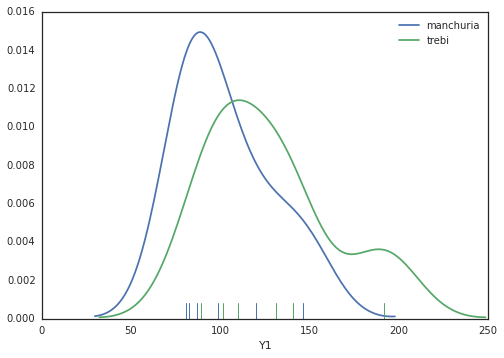

In [7]:
sns.distplot(manchuria_yield, rug=True, hist=False, label="manchuria")
sns.distplot(trebi_yield, rug=True, hist=False, label="trebi")

In [8]:
t, p = stats.ttest_ind(manchuria_yield, trebi_yield)
print t, p

-1.352886893 0.205886131092


How does it work?

$$t = \frac{\bar {X}_1 - \bar{X}_2}{s_{X_1X_2} \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

where $s_{X_1X_2}$ the the common variance

$$ s_{X_1X_2} = \sqrt{\frac{(n_1-1)s_{X_1}^2+(n_2-1)s_{X_2}^2}{n_1+n_2-2}}$$

What does it really mean? Further away the means are the higher the statistic gets

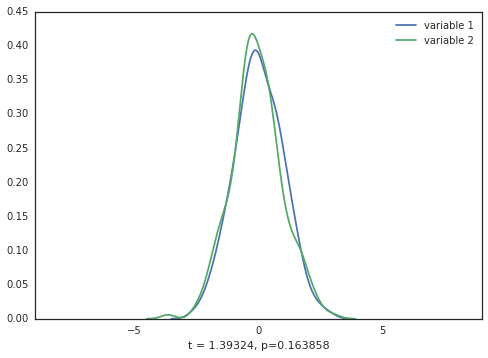

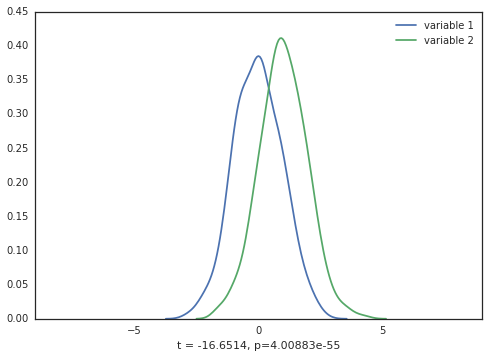

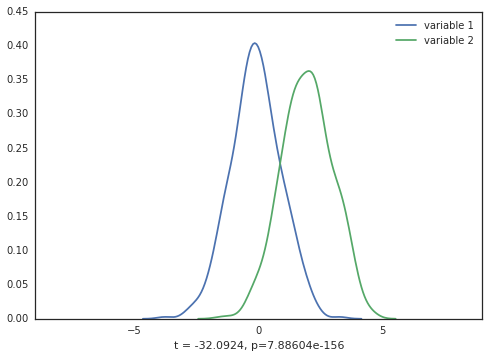

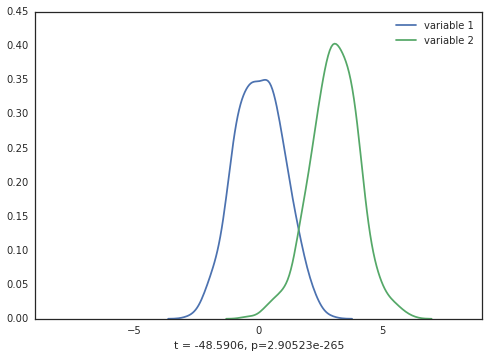

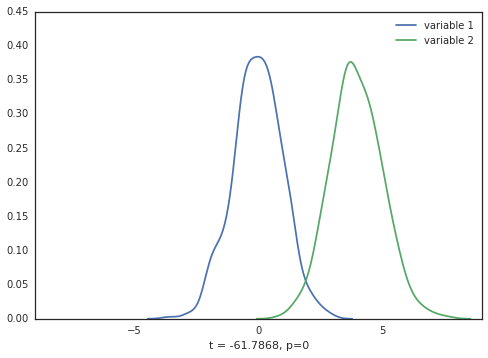

In [9]:
for rv2_mean in range(0,5,1):
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=500)
    rvs2 = stats.norm.rvs(loc=rv2_mean,scale=1,size=500)
    stats.ttest_ind(rvs1,rvs2)
    f = plt.figure()
    sns.distplot(rvs1, hist=False, label="variable 1")
    sns.distplot(rvs2, hist=False, label="variable 2", axlabel="t = %g, p=%g"%stats.ttest_ind(rvs1,rvs2))
    plt.xlim([-9,9])
    plt.ylim([0, 0.45])

In general the less there is an overlap between the two distributions the higher the statistic

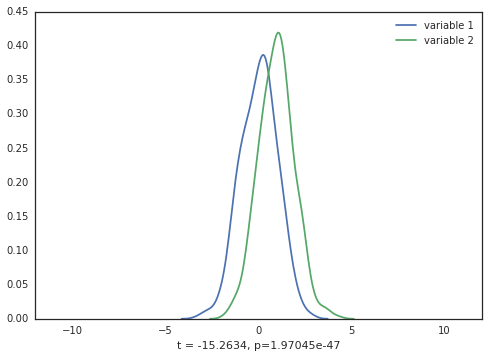

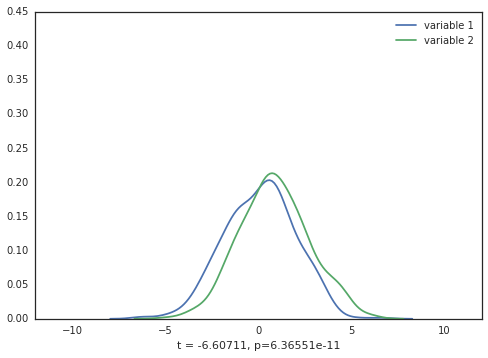

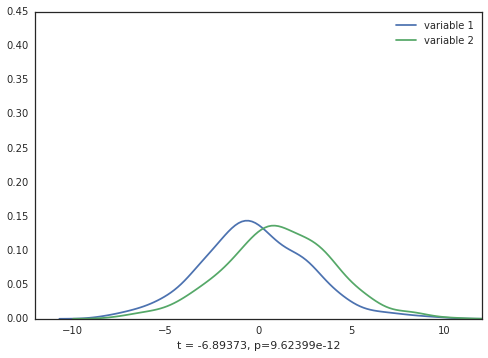

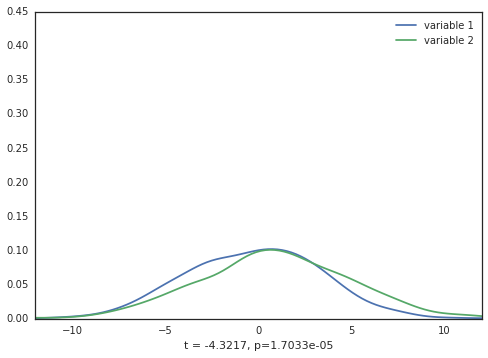

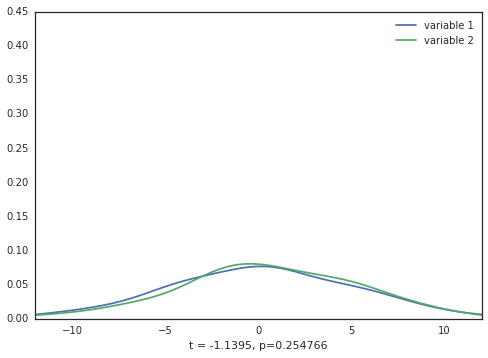

In [10]:
for rvs_spread in range(1,6,1):
    rvs1 = stats.norm.rvs(loc=0,scale=rvs_spread,size=500)
    rvs2 = stats.norm.rvs(loc=1,scale=rvs_spread,size=500)
    stats.ttest_ind(rvs1,rvs2)
    plt.figure()
    sns.distplot(rvs1, hist=False, label="variable 1")
    sns.distplot(rvs2, hist=False, label="variable 2", axlabel="t = %g, p=%g"%stats.ttest_ind(rvs1,rvs2))
    plt.xlim([-12,12])
    plt.ylim([0, 0.45])

The higher the sample size the higher the statistic.

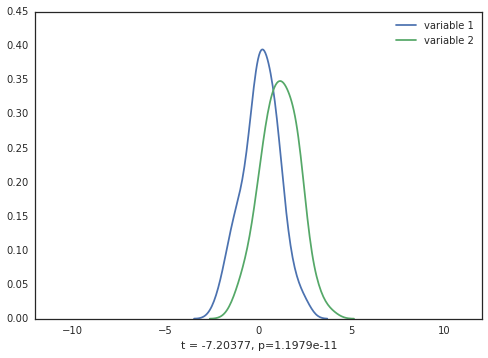

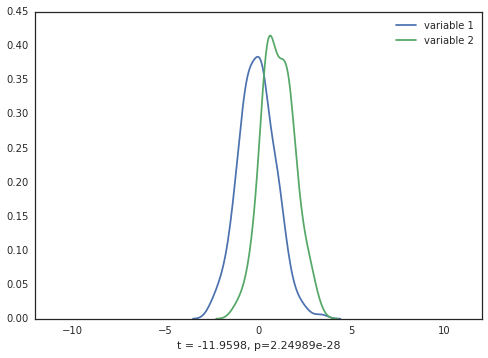

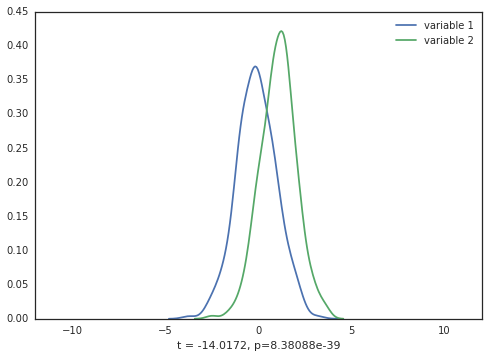

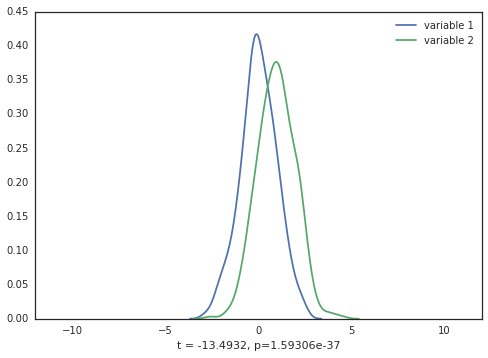

In [11]:
for sample_size in range(100,500,100):
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=sample_size)
    rvs2 = stats.norm.rvs(loc=1,scale=1,size=sample_size)
    stats.ttest_ind(rvs1,rvs2)
    plt.figure()
    sns.distplot(rvs1, hist=False, label="variable 1")
    sns.distplot(rvs2, hist=False, label="variable 2", axlabel="t = %g, p=%g"%stats.ttest_ind(rvs1,rvs2))
    plt.xlim([-12,12])
    plt.ylim([0, 0.45])

Sample size not only increases the statistic, but also increases degrees of freedom which are used for calculating the p value.

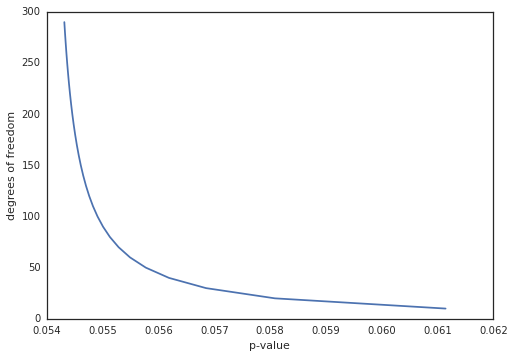

In [12]:
dfs = range(10,300, 10)
ps = [stats.t.pdf(2, df) for df in dfs]
plt.plot(ps, dfs)
plt.xlabel("p-value")
plt.ylabel("degrees of freedom")

Even tiniest effect size can be statistically significant if you collect enough samples.

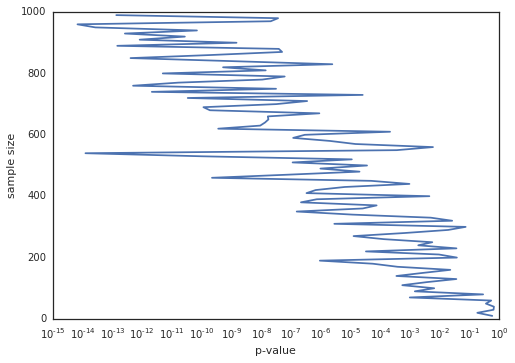

In [13]:
sample_sizes = range(10, 1000, 10)
ps = [stats.ttest_ind(stats.norm.rvs(loc=0,scale=1,size=sample_size),
                      stats.norm.rvs(loc=0.3,scale=1,size=sample_size))[1] for sample_size in sample_sizes]
plt.semilogx(ps, sample_sizes)
plt.xlabel("p-value")
plt.ylabel("sample size")

__Excercise:__ plot distributions of svansona and velvet crops, and perform a two sample t test. Now include every sample from each crop type __twice__ in the test - what will hapen to the p-value? 

In [14]:
svansona_yield = immer_data.Y1[immer_data.Var == "S"]
velvet_yield = immer_data.Y1[immer_data.Var == "V"]

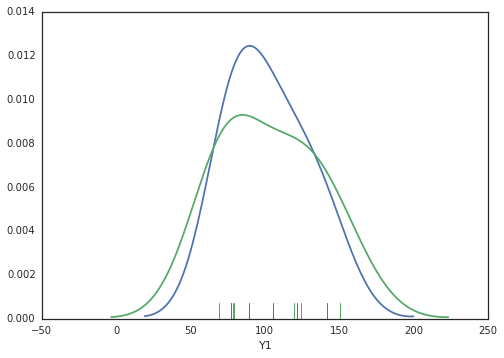

In [15]:
sns.distplot(svansona_yield, hist=False, rug=True)
sns.distplot(velvet_yield, hist=False, rug=True)

In [16]:
stats.ttest_ind(svansona_yield, velvet_yield)

Ttest_indResult(statistic=-0.084090620384495413, pvalue=0.93464398923779979)

In [17]:
svansona_yield_doubled = list(svansona_yield) + list(svansona_yield)
velvet_yield_doubled = list(velvet_yield) + list(velvet_yield)
stats.ttest_ind(svansona_yield_doubled, velvet_yield_doubled)

Ttest_indResult(statistic=-0.1247265463348886, pvalue=0.90187271155787685)

## Paired T test

In [18]:
year1_yield = immer_data.Y1
year2_yield = immer_data.Y2

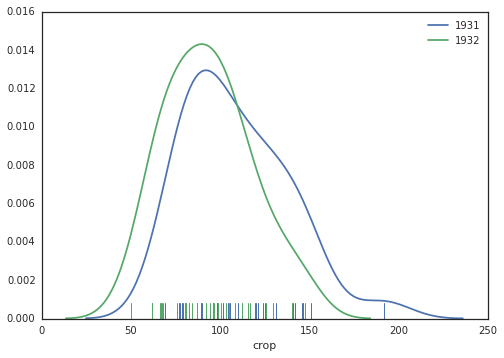

In [19]:
sns.distplot(year1_yield, rug=True, hist=False, label="1931")
sns.distplot(year2_yield, rug=True, hist=False, label="1932")
plt.xlabel("crop")

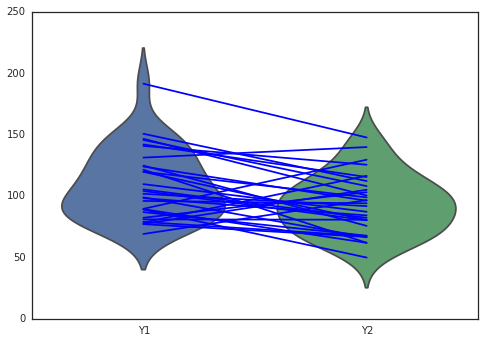

In [20]:
sns.violinplot(inner=None, data=immer_data)
for y1, y2 in zip(year1_yield, year2_yield):
    plt.plot([0,1], [y1,y2], color="b")

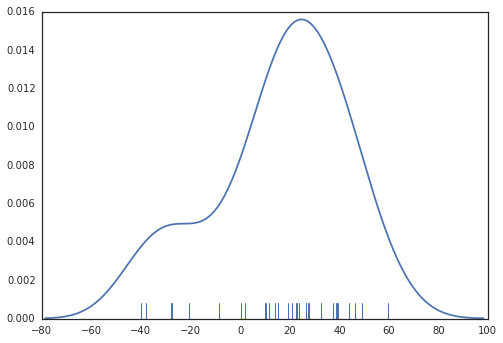

In [21]:
y_diff = year1_yield-year2_yield
sns.distplot(y_diff,  rug=True, hist=False)

Let's calculate a one sample t-test checking if the distribution of differences is significantly different from zero.

In [22]:
stats.ttest_1samp(y_diff, 0)

Ttest_1sampResult(statistic=3.3239873042716788, pvalue=0.0024126338636167597)

This is equivalent to so called paired two sample t test

In [23]:
stats.ttest_rel(year1_yield,year2_yield)

Ttest_relResult(statistic=3.3239873042716788, pvalue=0.0024126338636167597)

What would happen if we ignored the pairing and treat the samples as independent?

In [24]:
stats.ttest_ind(year1_yield,year2_yield)

Ttest_indResult(statistic=2.3199548629875282, pvalue=0.023883598700006337)

The result is similar, but would it always be the case? Let's generate a lot of data and compare the difference between two sample independent and paired tests.

In [25]:
t_diffs = []
rvs = []
for i in range(1000):
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=15)
    rvs2 = stats.norm.rvs(loc=0.2,scale=1,size=15)
    t_rel, _ = stats.ttest_rel(rvs1,rvs2)
    t_ind, _ = stats.ttest_ind(rvs1,rvs2)
    t_diff = t_rel - t_ind
    t_diffs.append(t_diff)
    rvs.append((rvs1, rvs2))

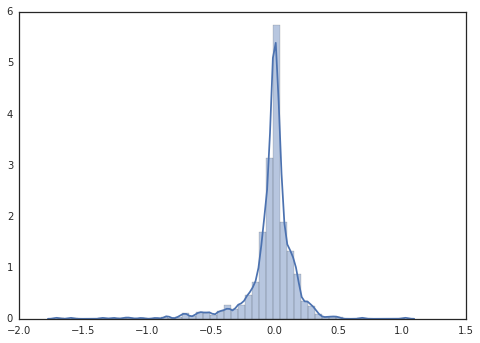

In [26]:
sns.distplot(t_diffs)

Note that the distribution is left skewed. This means that independent samples t test has more often higher values than the paired version.

Let's pick an extreme

In [27]:
rv1, rv2 = rvs[np.array(t_diffs).argmax()]

/home/vagrant/miniconda/lib/python2.7/site-packages/seaborn/categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


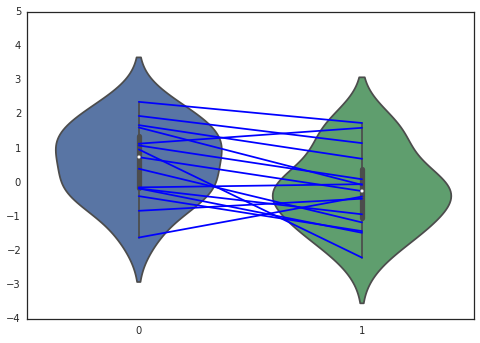

In [28]:
sns.violinplot(pd.DataFrame(np.array([rv1, rv2]).T))
for y1, y2 in zip(rv1, rv2):
    plt.plot([0,1], [y1,y2], color="b")

In [29]:
stats.ttest_rel(rv1, rv2)

Ttest_relResult(statistic=2.9220607590480232, pvalue=0.011145245653294555)

In [30]:
stats.ttest_ind(rv1, rv2)

Ttest_indResult(statistic=1.8957443217426311, pvalue=0.068358758989211996)

Using the wrong test can result in a test being less or more significant than it should. However the sign of the stattistic can never change.

## Correlation between values

Are the yields of barley crops in 1931 correlated with yields in 1932

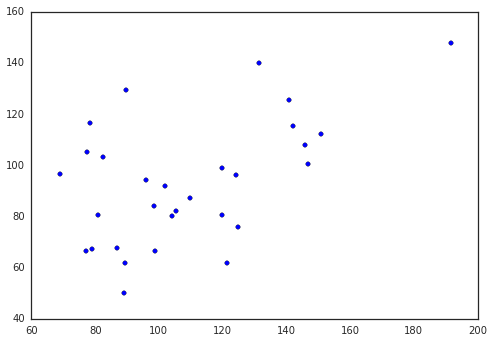

In [31]:
plt.scatter(x=year1_yield, y=year2_yield)

We can try to fit a line to this plot. A line is defined by the following equation:
$$ y = ax + b $$
where $a$ the slope and $b$ is the intercept of the line.

In [32]:
slope, intercept, r_value, p_value, std_err = stats.linregress(year1_yield, year2_yield)

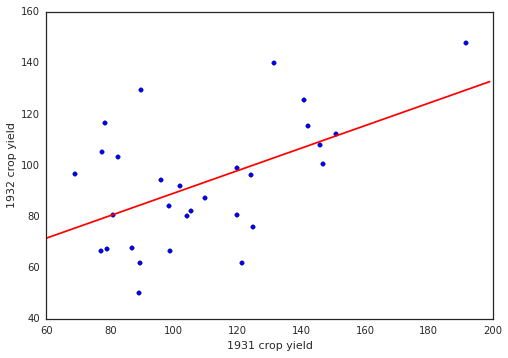

In [33]:
plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(60,200),intercept+slope*np.arange(60,200), color="r")
plt.xlim([60, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")

From the equation we can see that the intercept is equivalent to the crop yield in 1932 (y) in case the yield in 1931 (x) was zero:
$$ y = a0 + b = b$$

45.1275605247


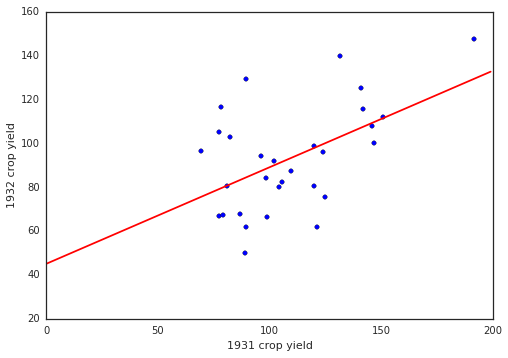

In [34]:
plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(0,200),intercept+slope*np.arange(0,200), color="r")
plt.xlim([0, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")
print intercept

How is this line fitted? The line is a prediction. It tells you what should be the crop yield in 1932 based on 1931. But it's not perfect. Let's draw how far the predictions are from reality.

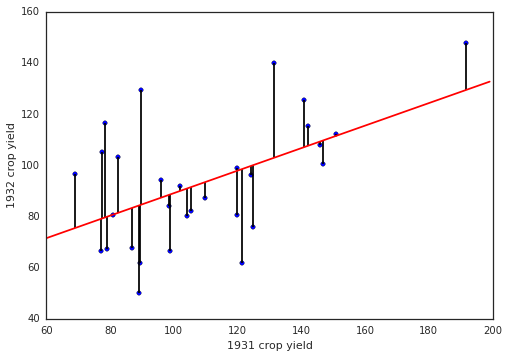

In [35]:
plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(60,200),intercept+slope*np.arange(60,200), color="r")
plt.xlim([60, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")
plt.vlines(year1_yield, year2_yield,intercept+slope*year1_yield)

We can count the errors

In [36]:
print np.abs(year2_yield-intercept+slope*year1_yield).sum()

2880.34636852


Different lines will have bigger different errors:

3671.05636852


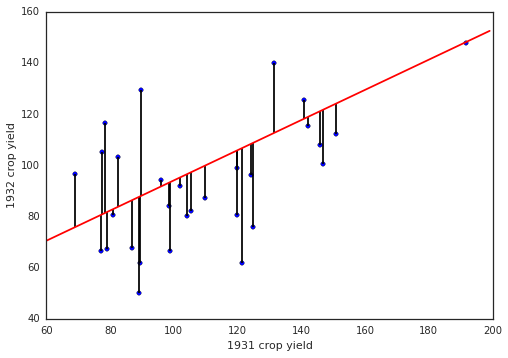

In [37]:
slope2 = slope + 0.15
intercept2 = intercept - 10

plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(60,200),intercept2+slope2*np.arange(60,200), color="r")
plt.xlim([60, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")
plt.vlines(year1_yield, year2_yield,intercept2+slope2*year1_yield)
print np.abs(year2_yield-intercept2+slope2*year1_yield).sum()

The fitting procedure is minimizing those errors trying to find a line that best describes the data.

In practice sum of absolute values of errors is not minimized - it's the sum of squares

In [38]:
print ((year2_yield-intercept2+slope2*year1_yield)**2).sum()

487009.427745


In [39]:
((year2_yield-intercept2+slope2*year1_yield)**2).sum()

487009.42774532107

In practice this means that big errors will make much bigger impact on the fit than small errors.

Why square not absolute value? This comes from the fact that linear regression model is using Gaussian random noise.

$$ y = ax + b + \epsilon$$
where $\epsilon = N(0,1)$ (is a Gaussina with mean zero and variance 1)

Note that fitting a linear model has a close solution. This means that we can calculate optimal slope and intercept parameters without having to try multiple different lines.

To assess how well we can predict values of one variable with the values of another we can use the correlation value

In [40]:
r_value

0.52000353342794481

Correlation is nothing else than covariance of the two variables normalized by their variance. It varies from -1 (anticorrealted), through 0 (uncorrelated), to 1 (fully correlated)

$$P_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }$$

In [41]:
np.corrcoef(x=year1_yield, y=year2_yield)

array([[ 1.        ,  0.52000353],
       [ 0.52000353,  1.        ]])

Correlation coefficient has another interesting property - when squared it describes the percentage of variance of variable Y explained by one varaince in variable X (and vice versa) 

In [42]:
r_value**2*100

27.040367477754774

There is also a p-value. It is directly related to the r_value and the number of samples.

__Excercise__: There is clearly an outlier in the distribution (data point in the upper right corner on the scatterplot) what will happen to the correlation if you remove it?

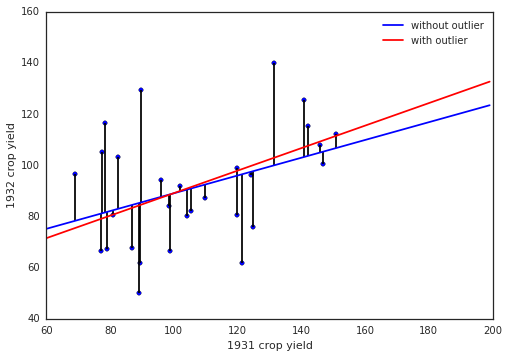

In [103]:
year1_yield_no_outlier = year1_yield[year1_yield!=year1_yield.max()]
year2_yield_no_outlier = year2_yield[year1_yield!=year1_yield.max()]
slope, intercept, r_value, p_value, std_err = stats.linregress(year1_yield_no_outlier, year2_yield_no_outlier)
plt.scatter(x=year1_yield_no_outlier, y=year2_yield_no_outlier)
plt.plot(np.arange(60,200),intercept+slope*np.arange(60,200), color="b", label="without outlier")
plt.xlim([60, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")
plt.vlines(year1_yield_no_outlier, year2_yield_no_outlier,intercept+slope*year1_yield_no_outlier)

slope, intercept, r_value, p_value, std_err = stats.linregress(year1_yield, year2_yield)
plt.plot(np.arange(60,200),intercept+slope*np.arange(60,200), color="r", label="with outlier")
plt.legend()

## Multiple linear regression

In [43]:
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data

In [44]:
ds = sm.datasets.get_rdataset("Duncan", "car", cache=True)
print ds.__doc__

+----------+-------------------+
| Duncan   | R Documentation   |
+----------+-------------------+

Duncan's Occupational Prestige Data
-----------------------------------

Description
~~~~~~~~~~~

The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
prestige and other characteristics of 45 U. S. occupations in 1950.

Usage
~~~~~

::

    Duncan

Format
~~~~~~

This data frame contains the following columns:

type
    Type of occupation. A factor with the following levels: ``prof``,
    professional and managerial; ``wc``, white-collar; ``bc``,
    blue-collar.

income
    Percent of males in occupation earning $3500 or more in 1950.

education
    Percent of males in occupation in 1950 who were high-school
    graduates.

prestige
    Percent of raters in NORC study rating occupation as excellent or
    good in prestige.

Source
~~~~~~

Duncan, O. D. (1961) A socioeconomic index for all occupations. In
Reiss, A. J., Jr. (Ed.) *Occupations and Social Status.* Free Press
[Ta

In [45]:
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


How well can we describe predict prestige using education and icome?

In [46]:
prestige_model = ols("prestige ~ income + education", data=prestige).fit()
prestige_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 01 Sep 2015   Prob (F-statistic):           8.65e-17
Time:                        06:01:40   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163       -14.686     2.556
income         0.5987      0.120      5.003      0.000         0.357     0.840
education      0.5458      0.098      5.555      0.000         0.348     0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multiple linear regression (or General Linear Models - GLM) are based on the premise of a matrix of variables describing the data:
$$ Y = \beta X + \epsilon $$
where $\beta$ are the coefficient and X is the design matrix. In our case the design matrix looks this way

<matplotlib.colorbar.Colorbar instance at 0x7fd8be725cf8>

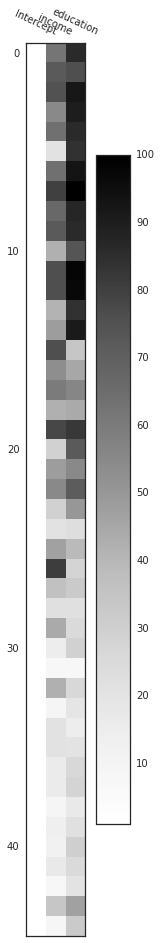

In [47]:
plt.matshow(prestige_model.model.exog)
plt.xticks(range(3), prestige_model.model.exog_names, rotation=-25)
plt.colorbar()

Note that on top of our two regressors of interest ("income" and "education") we also have "intercept" just like in regural linear regrossion with one variable.

In fact we can recreate the same results from our previous example using GLM.

In [48]:
crop_model = ols("Y2 ~ Y1", data=immer_ds.data).fit()
crop_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     10.38
Date:                Tue, 01 Sep 2015   Prob (F-statistic):            0.00323
Time:                        06:01:40   Log-Likelihood:                -133.01
No. Observations:                  30   AIC:                             270.0
Df Residuals:                      28   BIC:                             272.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.1276     15.392      2.932      0.007        13.598    76.657
Y1             0.4402      0.137      3.221      0.003         0.160     0.720
==============================================================================
Omnibus:                        1.042   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                1.009
Skew:                           0.390   Prob(JB):                        0.604
Kurtosis:                       2.553   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<matplotlib.colorbar.Colorbar instance at 0x7fd8be5c9a28>

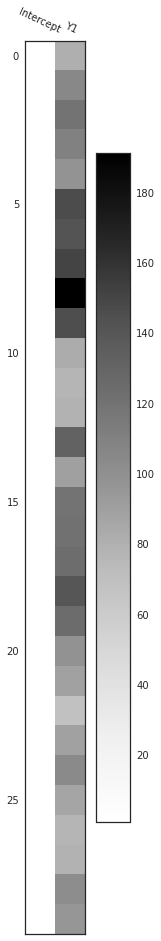

In [49]:
plt.matshow(crop_model.model.exog)
plt.xticks(range(2), crop_model.model.exog_names, rotation=-25)
plt.colorbar()

You can also express two sample T test in GLM

In [50]:
immer_subset = immer_data[np.logical_or(immer_data.Var == "M", immer_data.Var == "T")]

In [51]:
subset_model = ols("Y1 ~ Var", data=immer_subset).fit()
subset_model.summary()

/home/vagrant/miniconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.830
Date:                Tue, 01 Sep 2015   Prob (F-statistic):              0.206
Time:                        06:01:41   Log-Likelihood:                -57.436
No. Observations:                  12   AIC:                             118.9
Df Residuals:                      10   BIC:                             119.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    102.5833     12.971      7.909      0.000        73.683   131.484
Var[T.T]      24.8167     18.343      1.353      0.206       -16.055    65.689
==============================================================================
Omnibus:                        2.846   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                1.551
Skew:                           0.875   Prob(JB):                        0.460
Kurtosis:                       2.807   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<matplotlib.colorbar.Colorbar instance at 0x7fd8be3f2f38>

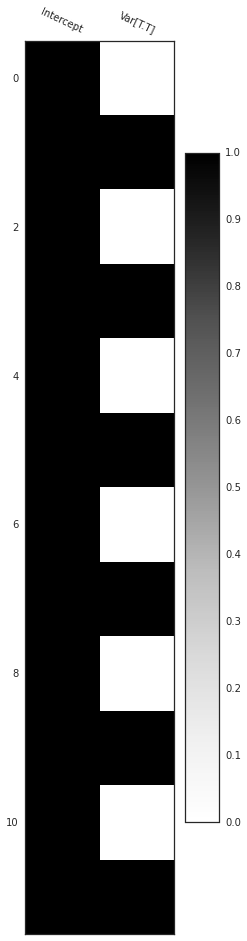

In [52]:
plt.matshow(subset_model.model.exog)
plt.xticks(range(2), subset_model.model.exog_names, rotation=-25)
plt.colorbar()

This model can be also used for more than two "groups"

In [53]:
full_model = ols("Y1 ~ Var", data=immer_ds.data).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.8170
Date:                Tue, 01 Sep 2015   Prob (F-statistic):              0.526
Time:                        06:01:41   Log-Likelihood:                -140.90
No. Observations:                  30   AIC:                             291.8
Df Residuals:                      25   BIC:                             298.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    102.5833     11.857      8.652      0.000        78.164   127.003
Var[T.P]       7.1667     16.768      0.427      0.673       -27.368    41.701
Var[T.S]      -0.5500     16.768     -0.033      0.974       -35.084    33.984
Var[T.T]      24.8167     16.768      1.480      0.151        -9.718    59.351
Var[T.V]       0.8833     16.768      0.053      0.958       -33.651    35.418
==============================================================================
Omnibus:                        2.958   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.648
Skew:                           0.678   Prob(JB):                        0.266
Kurtosis:                       2.472   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<matplotlib.colorbar.Colorbar instance at 0x7fd8bf302128>

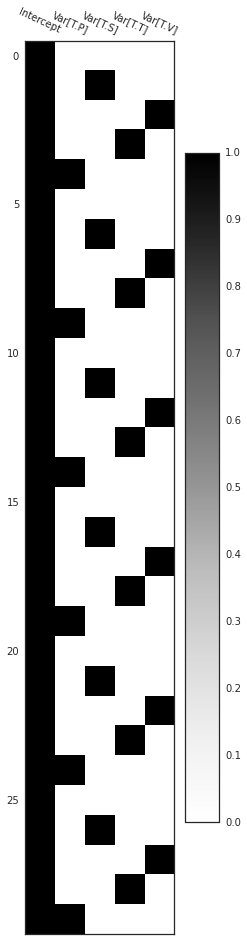

In [54]:
plt.matshow(full_model.model.exog)
plt.xticks(range(len(full_model.model.exog_names)), full_model.model.exog_names, rotation=-25)
plt.colorbar()

We can now explicitly test hypotheses such as is there a difference between manchuria and trebi.

In [55]:
full_model.f_test("Var[T.P] = Var[T.T]")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 1.10795911]]), p=0.302594070459, df_denom=25, df_num=1>

Which is equivalent to

In [56]:
full_model.f_test([0,1,0,-1,0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 1.10795911]]), p=0.302594070459, df_denom=25, df_num=1>

There are also other ways of coding categorical variables in design matrices

## Shared variance and colinearity

In [57]:
data = sm.datasets.longley.load_pandas().data
data.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323,83.0,234289,2356,1590,107608,1947
1,61122,88.5,259426,2325,1456,108632,1948
2,60171,88.2,258054,3682,1616,109773,1949
3,61187,89.5,284599,3351,1650,110929,1950
4,63221,96.2,328975,2099,3099,112075,1951


In [58]:
print sm.datasets.longley.NOTE

::

    Number of Observations - 16

    Number of Variables - 6

    Variable name definitions::

            TOTEMP - Total Employment
            GNPDEFL - GNP deflator
            GNP - GNP
            UNEMP - Number of unemployed
            ARMED - Size of armed forces
            POP - Population
            YEAR - Year (1947 - 1962)



First we fit a model with one variable

In [59]:
model_1 = ols("TOTEMP ~ POP", data=data).fit()
model_1.summary()

/home/vagrant/miniconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     166.3
Date:                Tue, 01 Sep 2015   Prob (F-statistic):           3.69e-09
Time:                        06:01:42   Log-Likelihood:                -132.37
No. Observations:                  16   AIC:                             268.7
Df Residuals:                      14   BIC:                             270.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8380.6742   4422.434      1.895      0.079     -1104.503  1.79e+04
POP            0.4849      0.038     12.896      0.000         0.404     0.566
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.723
Skew:                           0.227   Prob(JB):                        0.697
Kurtosis:                       2.063   Cond. No.                     2.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lots of variance explained and high t value!

Lets try another variable

In [60]:
model_2 = ols("TOTEMP ~ GNP", data=data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 01 Sep 2015   Prob (F-statistic):           8.36e-12
Time:                        06:01:42   Log-Likelihood:                -125.43
No. Observations:                  16   AIC:                             254.9
Df Residuals:                      14   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.184e+04    681.372     76.087      0.000      5.04e+04  5.33e+04
GNP            0.0348      0.002     20.374      0.000         0.031     0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even more variance explained and even higher t value!

Let's put both variables in the model

In [61]:
model_1_plus_2 = ols("TOTEMP ~ POP + GNP", data=data).fit()
model_1_plus_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     303.9
Date:                Tue, 01 Sep 2015   Prob (F-statistic):           1.22e-11
Time:                        06:01:42   Log-Likelihood:                -121.88
No. Observations:                  16   AIC:                             249.8
Df Residuals:                      13   BIC:                             252.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.894e+04   1.38e+04      6.452      0.000      5.92e+04  1.19e+05
POP           -0.4097      0.152     -2.693      0.018        -0.738    -0.081
GNP            0.0632      0.011      5.933      0.000         0.040     0.086
==============================================================================
Omnibus:                        0.827   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.601
Skew:                           0.435   Prob(JB):                        0.740
Kurtosis:                       2.618   Cond. No.                     4.20e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The t values decreased drastically! Effect of the population (POP) changed direction!

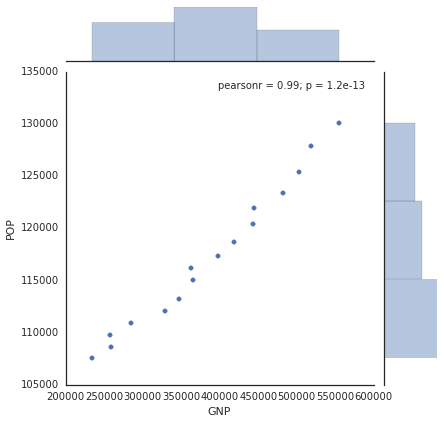

In [62]:
sns.jointplot("GNP", "POP", data=data)

It's because the two variables are highly correlated. t values and coefficients reported by a GLM model correspond only to the unique variance. Varaince shared by the independen variables are not assigned to any of them. Note however overall model performance ($R^2$) increased.

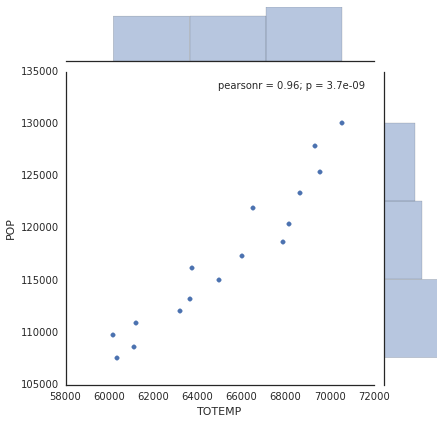

In [63]:
sns.jointplot("TOTEMP", "POP", data=data)

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["GNP"], data["POP"])

In [65]:
predicted = intercept+slope*data["GNP"]
data["POPwoGNP"] = data["POP"] - predicted

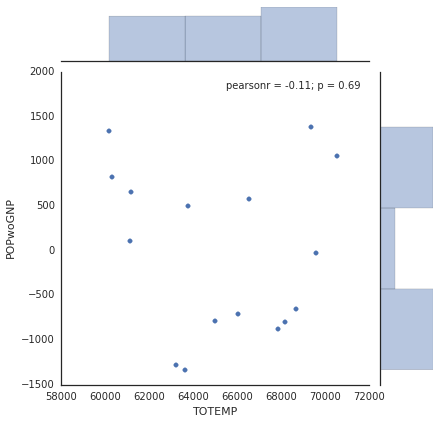

In [66]:
sns.jointplot("TOTEMP", "POPwoGNP", data=data)

__Excercise:__ There are many different models one could fit. Write a loop that iterates over a set of models and try to find one that shows the highest correlation between employment and the size of the armed forces. What can you learn from this experiment in the context of what we said about p-hacking?

In [81]:
regressors = set(data.columns) - set(["ARMED", "UNEMP"])
regressors

{'GNP', 'GNPDEFL', 'POP', 'POPwoGNP', 'TOTEMP', 'YEAR'}

In [86]:
list(itertools.combinations(regressors, 4))

[('GNP', 'GNPDEFL', 'YEAR', 'POP'),
 ('GNP', 'GNPDEFL', 'YEAR', 'TOTEMP'),
 ('GNP', 'GNPDEFL', 'YEAR', 'POPwoGNP'),
 ('GNP', 'GNPDEFL', 'POP', 'TOTEMP'),
 ('GNP', 'GNPDEFL', 'POP', 'POPwoGNP'),
 ('GNP', 'GNPDEFL', 'TOTEMP', 'POPwoGNP'),
 ('GNP', 'YEAR', 'POP', 'TOTEMP'),
 ('GNP', 'YEAR', 'POP', 'POPwoGNP'),
 ('GNP', 'YEAR', 'TOTEMP', 'POPwoGNP'),
 ('GNP', 'POP', 'TOTEMP', 'POPwoGNP'),
 ('GNPDEFL', 'YEAR', 'POP', 'TOTEMP'),
 ('GNPDEFL', 'YEAR', 'POP', 'POPwoGNP'),
 ('GNPDEFL', 'YEAR', 'TOTEMP', 'POPwoGNP'),
 ('GNPDEFL', 'POP', 'TOTEMP', 'POPwoGNP'),
 ('YEAR', 'POP', 'TOTEMP', 'POPwoGNP')]

In [71]:
import itertools
import pandas as pd
models = []
t_values = []
p_values = []
for i in range(len(regressors)):
    for regresor_subset in itertools.combinations(regressors, i):
        ind_variables = ["ARMED", ] + list(regresor_subset)
        models.append(ind_variables)
        model = ols("UNEMP ~ " + " + ".join(ind_variables), data=data).fit()
        t_values.append(model.params["ARMED"])
        p_values.append(model.pvalues["ARMED"])
        


In [88]:
t_values

[-0.23823618980853387,
 -0.74993585016869591,
 -0.79787067200432271,
 -0.74177671973940085,
 -0.66211434703015937,
 -0.69139168506110704,
 0.42587358006672982,
 -0.82734959800855779,
 -0.47403364494950279,
 -0.18053291820175732,
 -0.67251034064305992,
 -0.18053291820173872,
 -0.66442922867466248,
 -0.67174378603117357,
 -0.78032127265362061,
 -0.23178265250443181,
 -0.79137492410604504,
 -0.55453830607344579,
 -0.22775478771265117,
 -0.39376776397438845,
 -0.18053291820174952,
 -0.054831492349734556,
 -0.49061768940196926,
 -0.22675115011390623,
 -0.73034763357246058,
 -0.22675115011394137,
 -0.26944228728167097,
 -0.48378029205900264,
 -0.26944228727924091,
 -0.39532876139622419,
 -0.18053291820175066,
 -0.39532876139620654,
 -0.72736232807783296,
 -0.54112165438638615,
 -0.22876151308563436,
 -0.54872037744072455,
 -0.22675115011392866,
 -0.36500422757503009,
 -0.6397174326081011,
 -0.26944228727953762,
 -0.53113460536010937,
 -0.39532876139619955,
 -0.27138147648315575,
 -0.49461170

In [89]:
df = pd.DataFrame({"covariates": models, 
                   "p_values": p_values,
                   "t_values": t_values})

In [90]:
df.head()

,covariates,p_values,t_values
0,[ARMED],0.510949,-0.238236
1,"[ARMED, GNP]",0.012324,-0.749936
2,"[ARMED, GNPDEFL]",0.006173,-0.797871
3,"[ARMED, YEAR]",0.005779,-0.741777
4,"[ARMED, POP]",0.011559,-0.662114


In [92]:
df.sort(["t_values"])

,covariates,p_values,t_values
7,"[ARMED, GNP, GNPDEFL]",0.005849,-0.827350
2,"[ARMED, GNPDEFL]",0.006173,-0.797871
16,"[ARMED, YEAR, POP]",0.012489,-0.791375
14,"[ARMED, GNPDEFL, TOTEMP]",0.001125,-0.780321
1,"[ARMED, GNP]",0.012324,-0.749936
3,"[ARMED, YEAR]",0.005779,-0.741777
24,"[ARMED, GNP, GNPDEFL, TOTEMP]",0.001869,-0.730348
32,"[ARMED, GNPDEFL, YEAR, POP]",0.026681,-0.727362
5,"[ARMED, TOTEMP]",0.042309,-0.691392
10,"[ARMED, GNP, TOTEMP]",0.003298,-0.672510
